# ch1.NLP
- CountVectorizer 빈도수 계산 시 사용
- corpus : 말뭉치

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
'Data Science is an overlap between Arts and Science',
'Generally, Arts graduates are right-brained and Science graduates are left-brain',
'Excelling in both Arts and Science at a time becomes difficult',
'Natural Language Processing is a part of Data Science'
]

In [2]:
# 01 Solution : For all words
# 행렬로 변환 작업
bag_of_words_model = CountVectorizer()
print(bag_of_words_model.fit_transform(corpus).todense())

[[1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0]
 [0 1 2 1 0 0 0 0 1 1 0 0 0 1 2 0 0 0 1 0 0 0 0 0 1 1 0]
 [0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0]]


In [3]:
# DataFrame 형태로 변환
# sorted(): 정렬된 새로운 리스트를 생성.반환 /  vocabulary_ : 자동으로 단어 사전 생성
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(corpus).todense())
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

,an,and,are,arts,at,becomes,between,both,brain,brained,...,language,left,natural,of,overlap,part,processing,right,science,time
0,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2,0
1,0,1,2,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,0,1,0


In [4]:
## 02 Solution : Bag of word model for top 10 frequent terms
# max_features: 최대 단어 개수, fit_transform: 행렬로 변경
bag_of_words_model_small = CountVectorizer(max_features=10)
bag_of_words_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(corpus).todense())
bag_of_words_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)
bag_of_words_df_small.head()

,an,and,are,arts,data,graduates,is,processing,right,science
0,1,1,0,1,1,0,1,0,0,2
1,0,1,2,1,0,2,0,0,1,1
2,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,1,0,1,1,0,1


#  ch2.정규표현식과 토큰

In [5]:
# re: 정규표현식(regular expression)
from urllib.request import urlopen 
import re

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
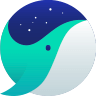
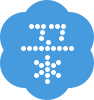

In [6]:
html = urlopen("http://www.naver.com")
print(html.read())

In [7]:
# BeautifulSoup 복잡한 소스의 가독성 up
from bs4 import BeautifulSoup

In [8]:
html = urlopen("http://www.naver.com")
bs = BeautifulSoup(html.read(), "html.parser")


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
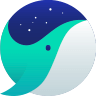
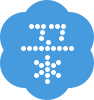

In [9]:
bs
# 트리구조로 이루어져 있다

<body>
 <div id="u_skip">
  <a href="#newsstand">
   <span>
    뉴스스탠드 바로가기
   </span>
  </a>
  <a href="#themecast">
   <span>
    주제별캐스트 바로가기
   </span>
  </a>
  <a href="#timesquare">
   <span>
    타임스퀘어 바로가기
   </span>
  </a>
  <a href="#shopcast">
   <span>
    쇼핑캐스트 바로가기
   </span>
  </a>
  <a href="#account">
   <span>
    로그인 바로가기
   </span>
  </a>
 </div>
 <div id="wrap">
  <style>
   ._1syGnXOL{padding-right:18px;font-size:14px;line-height:0;letter-spacing:-.25px;color:#000}._1syGnXOL span,._1syGnXOL strong{line-height:49px}._1syGnXOL:before{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20220527@2x.png);background-repeat:no-repeat;background-size:141px 112px;width:18px;height:18px;margin:16px 8px 0 0;background-position:-98px 0}[data-useragent*="MSIE 8"] ._1syGnXOL:before{background-image:url(https://static-whale.pstatic.net/main/sprite-20220527.png)}._1syGnXOL._3dsvmZg2:before{background-position:-47px -85
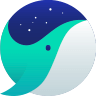
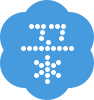

In [10]:
print(bs.body.prettify())

## html tag 탐색

<body> <div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div> <div id="wrap">
<style>._1syGnXOL{padding-right:18px;font-size:14px;line-height:0;letter-spacing:-.25px;color:#000}._1syGnXOL span,._1syGnXOL strong{line-height:49px}._1syGnXOL:before{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20220527@2x.png);background-repeat:no-repeat;background-size:141px 112px;width:18px;height:18px;margin:16px 8px 0 0;background-position:-98px 0}[data-useragent*="MSIE 8"] ._1syGnXOL:before{background-image:url(https://static-whale.pstatic.net/main/sprite-20220527.png)}._1syGnXOL._3dsvmZg2:before{background-position:-47px -85px}._1syGnXOL._1NBFx1WK:before{width:20px;height:20px;margin:15px 8px 0 0;background-position:-21px
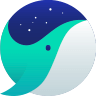
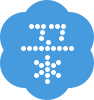

In [11]:
body = bs.body
body
# body>div>a>span

In [12]:
title = bs.body.h1
title

<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>

In [13]:
span_arr = bs.findAll("span")
span_arr

[<span>뉴스스탠드 바로가기</span>,
 <span>주제별캐스트 바로가기</span>,
 <span>타임스퀘어 바로가기</span>,
 <span>쇼핑캐스트 바로가기</span>,
 <span>로그인 바로가기</span>,
 <span class="_1syGnXOL _3VkgqBXB" data-clk="dropbanner1b" style="padding-right: 20px; font-size: 17px; color: black"><span>매일 쓰는 브라우저 보안이 걱정된다면, </span><strong>안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.</strong></span>,
 <span>매일 쓰는 브라우저 보안이 걱정된다면, </span>,
 <span style="background-color: #0436c7">다운로드</span>,
 <span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="ico_search_submit"></span>,
 <span class="blind">한글 입력기</span>,
 <span class="ico_keyboard"></span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="ico_arr"></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>,
 <span>@txt@</span>,
 <span class="etc">
 <em class="date">@date@.</e

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>,
 <a href="#themecast"><span>주제별캐스트 바로가기</span></a>,
 <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>,
 <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>,
 <a href="#account"><span>로그인 바로가기</span></a>,
 <a class="_3h-N8T9V" data-clk="dropbanner1b" href="https://whale.naver.com/ko/details/security/&amp;wpid=RydDy7"></a>,
 <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>,
 <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>,
 <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>,
 <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>,
 <a class="link_happybin" data-cl
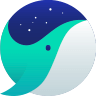
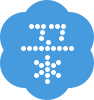

In [14]:
# a 링크 연동시 많이 사용, "#newsstand": 링크 url
link_arr = bs.findAll("a")
link_arr

## tag와 속성과 같이 탐색

In [15]:
# tag의  attribute. 속성 {"class": "blind"}
# and 구조로 탐색
span_blinds = bs.findAll("span", {"class": "blind"})
span_blinds

[<span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">한글 입력기</span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="blind">쇼핑</span>,
 <span class="blind">쇼핑LIVE</span>,
 <span class="blind">닫기</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">알림</span>,
 <span class="bl

## 형제 객체 탐색

In [16]:
# next_siblings 옆에 있는 태그 검색
for tmp in bs.body.find("input").next_siblings:
    print(tmp)



<input id="sm" name="sm" type="hidden" value="top_hty"/>


<input id="fbm" name="fbm" type="hidden" value="0"/>


<input disabled="disabled" id="acr" name="acr" type="hidden" value=""/>


<input disabled="disabled" id="acq" name="acq" type="hidden" value=""/>


<input disabled="disabled" id="qdt" name="qdt" type="hidden" value=""/>


<input id="ie" name="ie" type="hidden" value="utf8"/>


<input disabled="disabled" id="acir" name="acir" type="hidden" value=""/>


<input disabled="disabled" id="os" name="os" type="hidden" value=""/>


<input disabled="disabled" id="bid" name="bid" type="hidden" value=""/>


<input disabled="disabled" id="pkid" name="pkid" type="hidden" value=""/>


<input disabled="disabled" id="eid" name="eid" type="hidden" value=""/>


<input disabled="disabled" id="mra" name="mra" type="hidden" value=""/>


<div class="green_window" style="">
<!-- [AU] data-atcmp-element 에 해당하는 attribute를 추가해주세요. -->
<input accesskey="s" autocomplete="off" class="input_text" data-a

In [17]:
for tmp in bs.body.find("input", {"id":"ie"}).next_siblings:
    print(tmp)



<input disabled="disabled" id="acir" name="acir" type="hidden" value=""/>


<input disabled="disabled" id="os" name="os" type="hidden" value=""/>


<input disabled="disabled" id="bid" name="bid" type="hidden" value=""/>


<input disabled="disabled" id="pkid" name="pkid" type="hidden" value=""/>


<input disabled="disabled" id="eid" name="eid" type="hidden" value=""/>


<input disabled="disabled" id="mra" name="mra" type="hidden" value=""/>


<div class="green_window" style="">
<!-- [AU] data-atcmp-element 에 해당하는 attribute를 추가해주세요. -->
<input accesskey="s" autocomplete="off" class="input_text" data-atcmp-element="" id="query" maxlength="255" name="query" onclick="document.getElementById('fbm').value=1;" placeholder="검색어를 입력해 주세요." style="ime-mode:active;" tabindex="1" title="검색어 입력" type="search" value=""/>
</div>


<button class="btn_submit" id="search_btn" onclick="window.nclick(this,'sch.action','','',event);" style="" tabindex="3" title="검색" type="submit">
<span class="blind">검색</

In [18]:
# previous_siblings 앞뒤 태그 검색
for tmp in bs.body.find("input", {"id":"ie"}).previous_siblings:
    print(tmp)



<input disabled="disabled" id="qdt" name="qdt" type="hidden" value=""/>


<input disabled="disabled" id="acq" name="acq" type="hidden" value=""/>


<input disabled="disabled" id="acr" name="acr" type="hidden" value=""/>


<input id="fbm" name="fbm" type="hidden" value="0"/>


<input id="sm" name="sm" type="hidden" value="top_hty"/>


<input name="where" type="hidden" value="nexearch"/>


<legend class="blind">검색</legend>




In [19]:
bs.body.find("img")

<img alt="뉴스타파" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"/>

## 부모객체 탐색

In [20]:
bs.body.find("img").parent

<a class="thumb" href="#">
<img alt="뉴스타파" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"/>
<span class="thumb_dim"></span></a>

## 정규표현식

[<img alt="뉴스타파" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"/>,
 <img alt="MBN" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/057.png"/>,
 <img alt="매일경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/009.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2022/0208/nsd16121208.png"/>,
 <img alt="스포츠조선" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/076.png"/>,
 <img alt="전자신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/030.png"/>,
 <img alt="마이데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/117.png"/>,
 <img alt="조선일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2020/0903/nsd185255316.png"/>,
 <img 
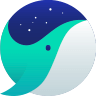
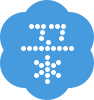

In [21]:
bs.body.findAll("img")

In [22]:
bs.body.findAll("img", {"src":re.compile(".jpg")})

[<img alt="울산·고양·평택·목포·태안·아산 '스마트시티'에 신규 지정…부동산 시장에 미칠 영향은" data-src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fpost.phinf%2FMjAyMzA1MDhfMjc1%2FMDAxNjgzNTIwNjc5Nzg1.7-RhnEW-kcHLQv2hC8ckyvCvc74bLlHp8assiVxfWlIg.TMCjZwblFSF3yvr92SsV6T3WwLGYsEfV8Dc7viLNSO4g.JPEG%2FI4WrL05-V14TsaVO2PlsQl8hcVGU.jpg%3Ftype%3Df339_222_q90%22&amp;type=nf340_228" height="114" onerror="this.outerHTML='&lt;span class=\'pm_noimg\'&gt;&lt;span class=\'noimg_text\'&gt;이미지 준비중&lt;/span&gt;&lt;/span&gt;'" src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fpost.phinf%2FMjAyMzA1MDhfMjc1%2FMDAxNjgzNTIwNjc5Nzg1.7-RhnEW-kcHLQv2hC8ckyvCvc74bLlHp8assiVxfWlIg.TMCjZwblFSF3yvr92SsV6T3WwLGYsEfV8Dc7viLNSO4g.JPEG%2FI4WrL05-V14TsaVO2PlsQl8hcVGU.jpg%3Ftype%3Df339_222_q90%22&amp;type=nf340_228" width="170"/>,
 <img alt="“영주권 드려요”, 부동산 투자이민제 3년 연장… 외국인 거래 늘어날까" data-src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fpost.phinf%2FMjAyMzA1MDhfMjk3%2FMDA

[<img alt="뉴스타파" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/930.png"/>,
 <img alt="MBN" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/057.png"/>,
 <img alt="매일경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/009.png"/>,
 <img alt="서울신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2022/0208/nsd16121208.png"/>,
 <img alt="스포츠조선" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/076.png"/>,
 <img alt="전자신문" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/030.png"/>,
 <img alt="마이데일리" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/117.png"/>,
 <img alt="조선일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/up/2020/0903/nsd185255316.png"/>,
 <img 
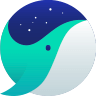
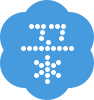

In [23]:
bs.body.findAll("img", {"src":re.compile(".png")})

In [24]:
# '^(https).*pngs$' => .='워드', *='0개이상', png$=png으로 끝나는 것
bs.body.findAll("img", {"src":re.compile('^(https).*pngs$')})

[]

In [25]:
# '^(https).*346*png$' => https로 시작해서 346을 포함하는
bs.body.findAll("img", {"src":re.compile('^(https).*346*png$')})

[]

## 특수문자 제거

In [26]:
text = "안녕하세요~!!^^* 반갑습니다..."
# "[!@#$%^&*()~:;.]"에 해당되는 패턴을 ""으로 대체
clean_text = re.sub("[!@#$%^&*()~:;.]", "", text)
clean_text

'안녕하세요 반갑습니다'

## 정규표현식에 부합되는 부분 찾기

In [27]:
re.search("[가~다]", "오늘의 날씨는 맑습니다")

<re.Match object; span=(11, 12), match='다'>

In [28]:
re.search("[7~9]", "3.15159297")

<re.Match object; span=(6, 7), match='9'>

In [29]:
# "\d+": 1개 이상의 숫자를 의미
re.search("\d+", "안젤라는 1988년에 태어났습니다.")

<re.Match object; span=(5, 9), match='1988'>

In [30]:
# 문자열 시작
re.search("[^7~9]", "3.15159297")

<re.Match object; span=(0, 1), match='3'>

# ch3.N그램과 지프의 법칙

지프의 법칙: 언어학에서 중요한 법칙으로 
텍스트 뭉치에서 추출한 토큰들을 -> 단어라 한다면 이 단어들을 사용 빈도가 높은 순서대로 나열하게 될 경우 순위가 발생하게 됩니다. 신기하게도 이 순위가 사용 빈도와 반비례한다는 법칙이다.

N그램: 문장, 텍스트에서 N개의 연속된 요소(토큰)들을 나열, 추출하는 방법
일반적인 단어 사전에서는 한 개의 단어-> 유니그램이 되고,
복합 단어의 경우 -> 바이그램, 세 개의 연속된 단어는 -> 트리그램이 된다.

In [31]:
from pylab import *
import nltk # 영어권. 텍스트 자연어 처리 모듈
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter # 빈도수 측정
newsgroups_data_sample = fetch_20newsgroups(subset='train')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juhae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [33]:
# 불용어 리스크 리턴
# 의미가 없는 단어들
stop_words = stopwords.words('english')

# adding individual printable characters to list of top words so that they get renoved
stop_words = stop_words + list(string.printable)

In [34]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import nltk
nltk.download('punkt')

# lower: 소문자로 변경
# re.sub(r'([^\s\w]|_)+'로 특수문자 제거
tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                   for word in word_tokenize(re.sub(r'([^\s\w]|_)+', '', sentence)) \
                   if word.lower() not in stop_words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juhae\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
tokenized_corpus

['lerxstwamumdedu',
 'wheres',
 'thing',
 'subject',
 'car',
 'nntppostinghost',
 'rac3wamumdedu',
 'organization',
 'university',
 'maryland',
 'college',
 'park',
 'lines',
 '15',
 'wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 '2door',
 'sports',
 'car',
 'looked',
 'late',
 '60s',
 'early',
 '70s',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'email',
 'thanks',
 'il',
 'brought',
 'neighborhood',
 'lerxst',
 'guykuocarsonuwashingtonedu',
 'guy',
 'kuo',
 'subject',
 'si',
 'clock',
 'poll',
 'final',
 'call',
 'summary',
 'final',
 'call',
 'si',
 'clock',
 'reports',
 'keywords',
 'siaccelerationclockupgrade',
 'articleid',
 'shelley1qvfo9innc3s',
 'organization',
 'university',
 'washington',
 

In [37]:
# 불용어 및 특수문자 없는 문자가 딕셔너리 형태로 출력된다
# 동일한 값의 자료 개수 파악
tokenized_count_di = Counter(tokenized_corpus)
tokenized_count_di

Counter({'lerxstwamumdedu': 2,
         'wheres': 23,
         'thing': 1519,
         'subject': 12253,
         'car': 1255,
         'nntppostinghost': 4781,
         'rac3wamumdedu': 7,
         'organization': 11185,
         'university': 5544,
         'maryland': 124,
         'college': 620,
         'park': 214,
         'lines': 11824,
         '15': 1241,
         'wondering': 303,
         'anyone': 2428,
         'could': 3495,
         'enlighten': 27,
         'saw': 548,
         'day': 1321,
         '2door': 7,
         'sports': 159,
         'looked': 342,
         'late': 287,
         '60s': 49,
         'early': 464,
         '70s': 56,
         'called': 1065,
         'bricklin': 4,
         'doors': 82,
         'really': 2174,
         'small': 780,
         'addition': 289,
         'front': 453,
         'bumper': 33,
         'separate': 217,
         'rest': 482,
         'body': 509,
         'know': 5116,
         'tellme': 2,
         'model': 442,
  

In [38]:
tokenized_count_di.most_common(50)

[('subject', 12253),
 ('lines', 11824),
 ('organization', 11185),
 ('would', 8874),
 ('one', 8654),
 ('writes', 7836),
 ('article', 6754),
 ('people', 5833),
 ('dont', 5814),
 ('like', 5760),
 ('university', 5544),
 ('know', 5116),
 ('get', 4943),
 ('nntppostinghost', 4781),
 ('think', 4503),
 ('also', 4296),
 ('use', 4155),
 ('new', 3922),
 ('time', 3865),
 ('im', 3727),
 ('good', 3719),
 ('could', 3495),
 ('well', 3460),
 ('us', 3406),
 ('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', 3307),
 ('may', 3271),
 ('even', 3259),
 ('see', 3034),
 ('many', 2934),
 ('way', 2927),
 ('first', 2894),
 ('make', 2881),
 ('two', 2874),
 ('much', 2863),
 ('distribution', 2763),
 ('system', 2702),
 ('say', 2698),
 ('right', 2680),
 ('god', 2557),
 ('want', 2515),
 ('said', 2446),
 ('world', 2442),
 ('used', 2434),
 ('anyone', 2428),
 ('need', 2406),
 ('go', 2403),
 ('work', 2342),
 ('something', 2223),
 ('problem', 2207),
 ('really', 2174)]

In [39]:
# frequencies 빈도수 계산 
frequencies = [b for (a,b) in tokenized_count_di.most_common(10000)]
tokens = [a for (a,b) in tokenized_count_di.most_common(10000)]
ranks = range(1, len(frequencies)+1)

In [40]:
ranks

range(1, 10001)

In [41]:
tokens

['subject',
 'lines',
 'organization',
 'would',
 'one',
 'writes',
 'article',
 'people',
 'dont',
 'like',
 'university',
 'know',
 'get',
 'nntppostinghost',
 'think',
 'also',
 'use',
 'new',
 'time',
 'im',
 'good',
 'could',
 'well',
 'us',
 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax',
 'may',
 'even',
 'see',
 'many',
 'way',
 'first',
 'make',
 'two',
 'much',
 'distribution',
 'system',
 'say',
 'right',
 'god',
 'want',
 'said',
 'world',
 'used',
 'anyone',
 'need',
 'go',
 'work',
 'something',
 'problem',
 'really',
 'please',
 'computer',
 'since',
 'still',
 'believe',
 'going',
 'years',
 'email',
 'back',
 'information',
 'file',
 'help',
 'using',
 'find',
 'take',
 'question',
 'thanks',
 'must',
 'state',
 'ive',
 'last',
 'point',
 'usa',
 'things',
 'better',
 'cant',
 'might',
 'replyto',
 'never',
 'government',
 'year',
 'number',
 'another',
 'sure',
 'got',
 'without',
 '10',
 'program',
 'read',
 'windows',
 'space',
 'case',
 'made',
 'data',
 'etc',
 'available',
 '

In [42]:
frequencies, len(frequencies)

([12253,
  11824,
  11185,
  8874,
  8654,
  7836,
  6754,
  5833,
  5814,
  5760,
  5544,
  5116,
  4943,
  4781,
  4503,
  4296,
  4155,
  3922,
  3865,
  3727,
  3719,
  3495,
  3460,
  3406,
  3307,
  3271,
  3259,
  3034,
  2934,
  2927,
  2894,
  2881,
  2874,
  2863,
  2763,
  2702,
  2698,
  2680,
  2557,
  2515,
  2446,
  2442,
  2434,
  2428,
  2406,
  2403,
  2342,
  2223,
  2207,
  2174,
  2143,
  2088,
  2069,
  2022,
  2021,
  2001,
  1984,
  1982,
  1959,
  1958,
  1940,
  1900,
  1895,
  1881,
  1862,
  1854,
  1841,
  1833,
  1833,
  1814,
  1803,
  1801,
  1797,
  1791,
  1782,
  1757,
  1754,
  1742,
  1729,
  1717,
  1714,
  1698,
  1694,
  1693,
  1677,
  1673,
  1661,
  1653,
  1648,
  1642,
  1616,
  1602,
  1578,
  1575,
  1573,
  1567,
  1566,
  1531,
  1528,
  1519,
  1516,
  1498,
  1485,
  1475,
  1465,
  1456,
  1453,
  1445,
  1440,
  1430,
  1424,
  1409,
  1403,
  1396,
  1392,
  1391,
  1385,
  1380,
  1379,
  1375,
  1374,
  1362,
  1355,
  1347,
  133

In [43]:
# 빈도 1위인 단어는 빈도 2위인 단어보다 약 2배 높은 빈도를 갖는다
# 빈도 1위인 단어는 빈도 3위인 단어보다 약 3배 높은 빈도를 갖는다

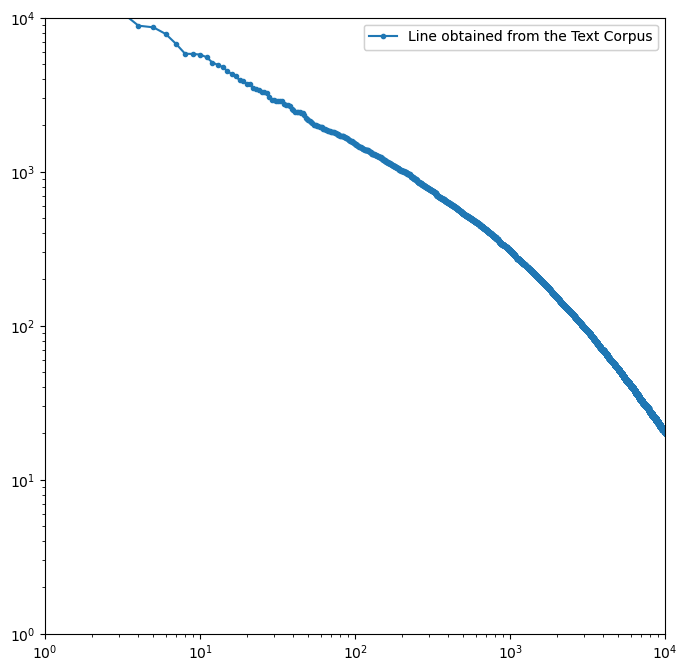

In [78]:
plt.figure(figsize=(8,8))
plt.ylim(1, 10**4) # frequency
plt.xlim(1, 10**4) # log(ranks)

# Actual ranks and frequencies
# loglog(x축, y축)
# 지프의 법칙과 유사한 결과가 출력되었다.
obtained_line = loglog(ranks, frequencies, marker=".", label="Line obtained from the Text Corpus")
obtained_legend = plt.legend(handles=(obtained_line), loc=1)
ax = plt.gca().add_artist(obtained_legend)

In [52]:
frequencies[0]

12253

AttributeError: 'list' object has no attribute 'get_label'

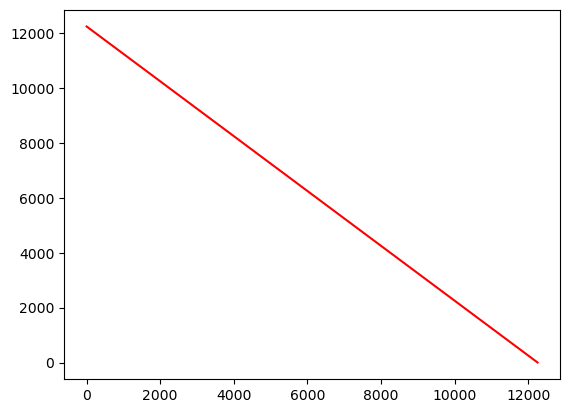

In [53]:
# Expected ranks and frequnecies as per Zipf's law
expected_line = plt.plot([1, frequencies[0]], [frequencies[0],1], color='r', label="Line expected as per Zipf's Law")
plt.legend(handles=[expected_line], loc=4)

title("Plot starting Zipf law's in log-log scale")
xlabel("Rank of token in descending order of frequency of occurrence")
ylabel("Frequency of occurrence of token")
grid(True)

### Extracting n-grams

In [54]:
# corpus
# appel dfj : 바이그램이 되는 것
sentence = 'suffsfsfsdflsfslfjljsl flsdfjkldsfkj fjsdl   dsfssdf sf dsdddfs. \
fsfsfs appel dfj sekf ahdn happy route dkfirwiiwriiweer efdo off officail_india \
dfsfh sjkhfskjfhskfh army sjfkksfk fs day eee@DDD.com:)'

In [55]:
import re 
# n_gram_extractor(sentence, n) n은 gram의 개수
def n_gram_extractor(sentence, n):
    tokens = re.sub(r'([^\s\w]|_)+', ' ', sentence).split()
    
    for i in range(len(tokens)-n+1):
        print(tokens[i:i+1])

In [56]:
# 바이그램
n_gram_extractor('The cute little boy in playing in the room',2)

['The']
['cute']
['little']
['boy']
['in']
['playing']
['in']
['the']


In [57]:
# 트리그램
n_gram_extractor('The cute little boy in playing in the room', 3)

['The']
['cute']
['little']
['boy']
['in']
['playing']
['in']


In [58]:
from nltk import ngrams 
# 바이그램
list(ngrams('The cute little boy in playing in the room'.split() ,2))

[('The', 'cute'),
 ('cute', 'little'),
 ('little', 'boy'),
 ('boy', 'in'),
 ('in', 'playing'),
 ('playing', 'in'),
 ('in', 'the'),
 ('the', 'room')]

In [59]:
list(ngrams('The cute little boy in playing in the room'.split() ,3))

[('The', 'cute', 'little'),
 ('cute', 'little', 'boy'),
 ('little', 'boy', 'in'),
 ('boy', 'in', 'playing'),
 ('in', 'playing', 'in'),
 ('playing', 'in', 'the'),
 ('in', 'the', 'room')]

In [60]:
from textblob import TextBlob # 텍스트 정보 처리 라이브러리
blob = TextBlob("The cute little boy is playing ")
blob.ngrams(n=2)

[WordList(['The', 'cute']),
 WordList(['cute', 'little']),
 WordList(['little', 'boy']),
 WordList(['boy', 'is']),
 WordList(['is', 'playing'])]

In [61]:
blob.ngrams(n=3)

[WordList(['The', 'cute', 'little']),
 WordList(['cute', 'little', 'boy']),
 WordList(['little', 'boy', 'is']),
 WordList(['boy', 'is', 'playing'])]

# ch4.불용어와 정규화

정규화란 모델이 이해할 수 있는 데이터 형태로 정보를 제한하는 작업

## stop words 제거

In [62]:
from nltk import word_tokenize # 영어 데이터를 샘플로 사용중이기에 nltk import

# sentence :적용문장. custom_stop_word_list :stop words 리스트 
sentence = "She sells seashells on the seashore"
custom_stop_word_list = ['she', 'on', 'the', 'am', 'is', 'not'] # 여기에 포함되지 않은 데이터만 추출
' '.join([word for word in word_tokenize(sentence) if word.lower() not in custom_stop_word_list])

'sells seashells seashore'

## 문자 단위 인코딩

In [66]:
# 문자 -> 숫자로 변환 
# ord(문자): 하나의 문자를 인자로 받고 해당 문자에 해당하는 유니코드 정수를 반환합니다.

# 대문자, 소문자, 특수문자 => 숫자로 encoding ASCII Code
# ord('a')를 넣으면 정수 97을 반환합니다.
ord('A'), ord('a'), ord('.')

(65, 97, 46)

In [67]:
def to_vector_ascil(text):
    return [ord(a) for a in text] # 문자 하나하나를 다 읽어서 ascii code로 변환

to_vector_ascil('quick brown fox')

[113, 117, 105, 99, 107, 32, 98, 114, 111, 119, 110, 32, 102, 111, 120]

In [68]:
import numpy as np
def to_vector_ascii(text):
    return np.array([ord(a) for a in text]) # [] list를  => array 형태로 변환

In [69]:
to_vector_ascii('quick brown fox')

array([113, 117, 105,  99, 107,  32,  98, 114, 111, 119, 110,  32, 102,
       111, 120])

In [70]:
from collections import OrderedDict

# 포지션을 인코딩 
# 하나하나의 위치를 인코딩
def positional_encode_chars(text):
    char_to_index = OrderedDict()
    index = 1
    
    for character in text:
        # char_to_index 안에 없는 것을 char_to_index(dict형태) 안에 담기
        if character not in char_to_index:
            char_to_index[character] = index
            index += 1 # 번호를 붙여서 하나하나씩 저장하겠다
    return char_to_index

positional_encode_chars('The water was as wet as it could be')

OrderedDict([('T', 1),
             ('h', 2),
             ('e', 3),
             (' ', 4),
             ('w', 5),
             ('a', 6),
             ('t', 7),
             ('r', 8),
             ('s', 9),
             ('i', 10),
             ('c', 11),
             ('o', 12),
             ('u', 13),
             ('l', 14),
             ('d', 15),
             ('b', 16)])

## 어간 추출 

In [71]:
# play playing played -> 똑같은 의미인데 변형으로 인해 따로따로 추출
# 대표로 어간을 추출
sentence = "i love playing football"

# RegexpStemmer: 사용자가 지정한 정규 표현 기준으로 접사 제거
from nltk.stem import RegexpStemmer
regex_stemmer = RegexpStemmer('ing$', min=4)

' '.join([regex_stemmer.stem(wd) for wd in sentence.split()])

'i love play football'

## 텍스트를 깨끗하게, 그리고 토크나이징

특수문자, 전화번호, 주민등록번호 등을 삭제시키길 희망한다면 re(regular expression)을 사용해야한다.

re를 이용해 패턴에 해당하는 문자를 제거

In [72]:
import re
sentence = 'Without some of the protections afforded him by the presidency.'

In [73]:
# 특수문자 -> 공백으로 replace, 공란으로 나누기
re.sub(r'([^\s\w]|_)+', ' ', sentence).split()

['Without',
 'some',
 'of',
 'the',
 'protections',
 'afforded',
 'him',
 'by',
 'the',
 'presidency']